In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

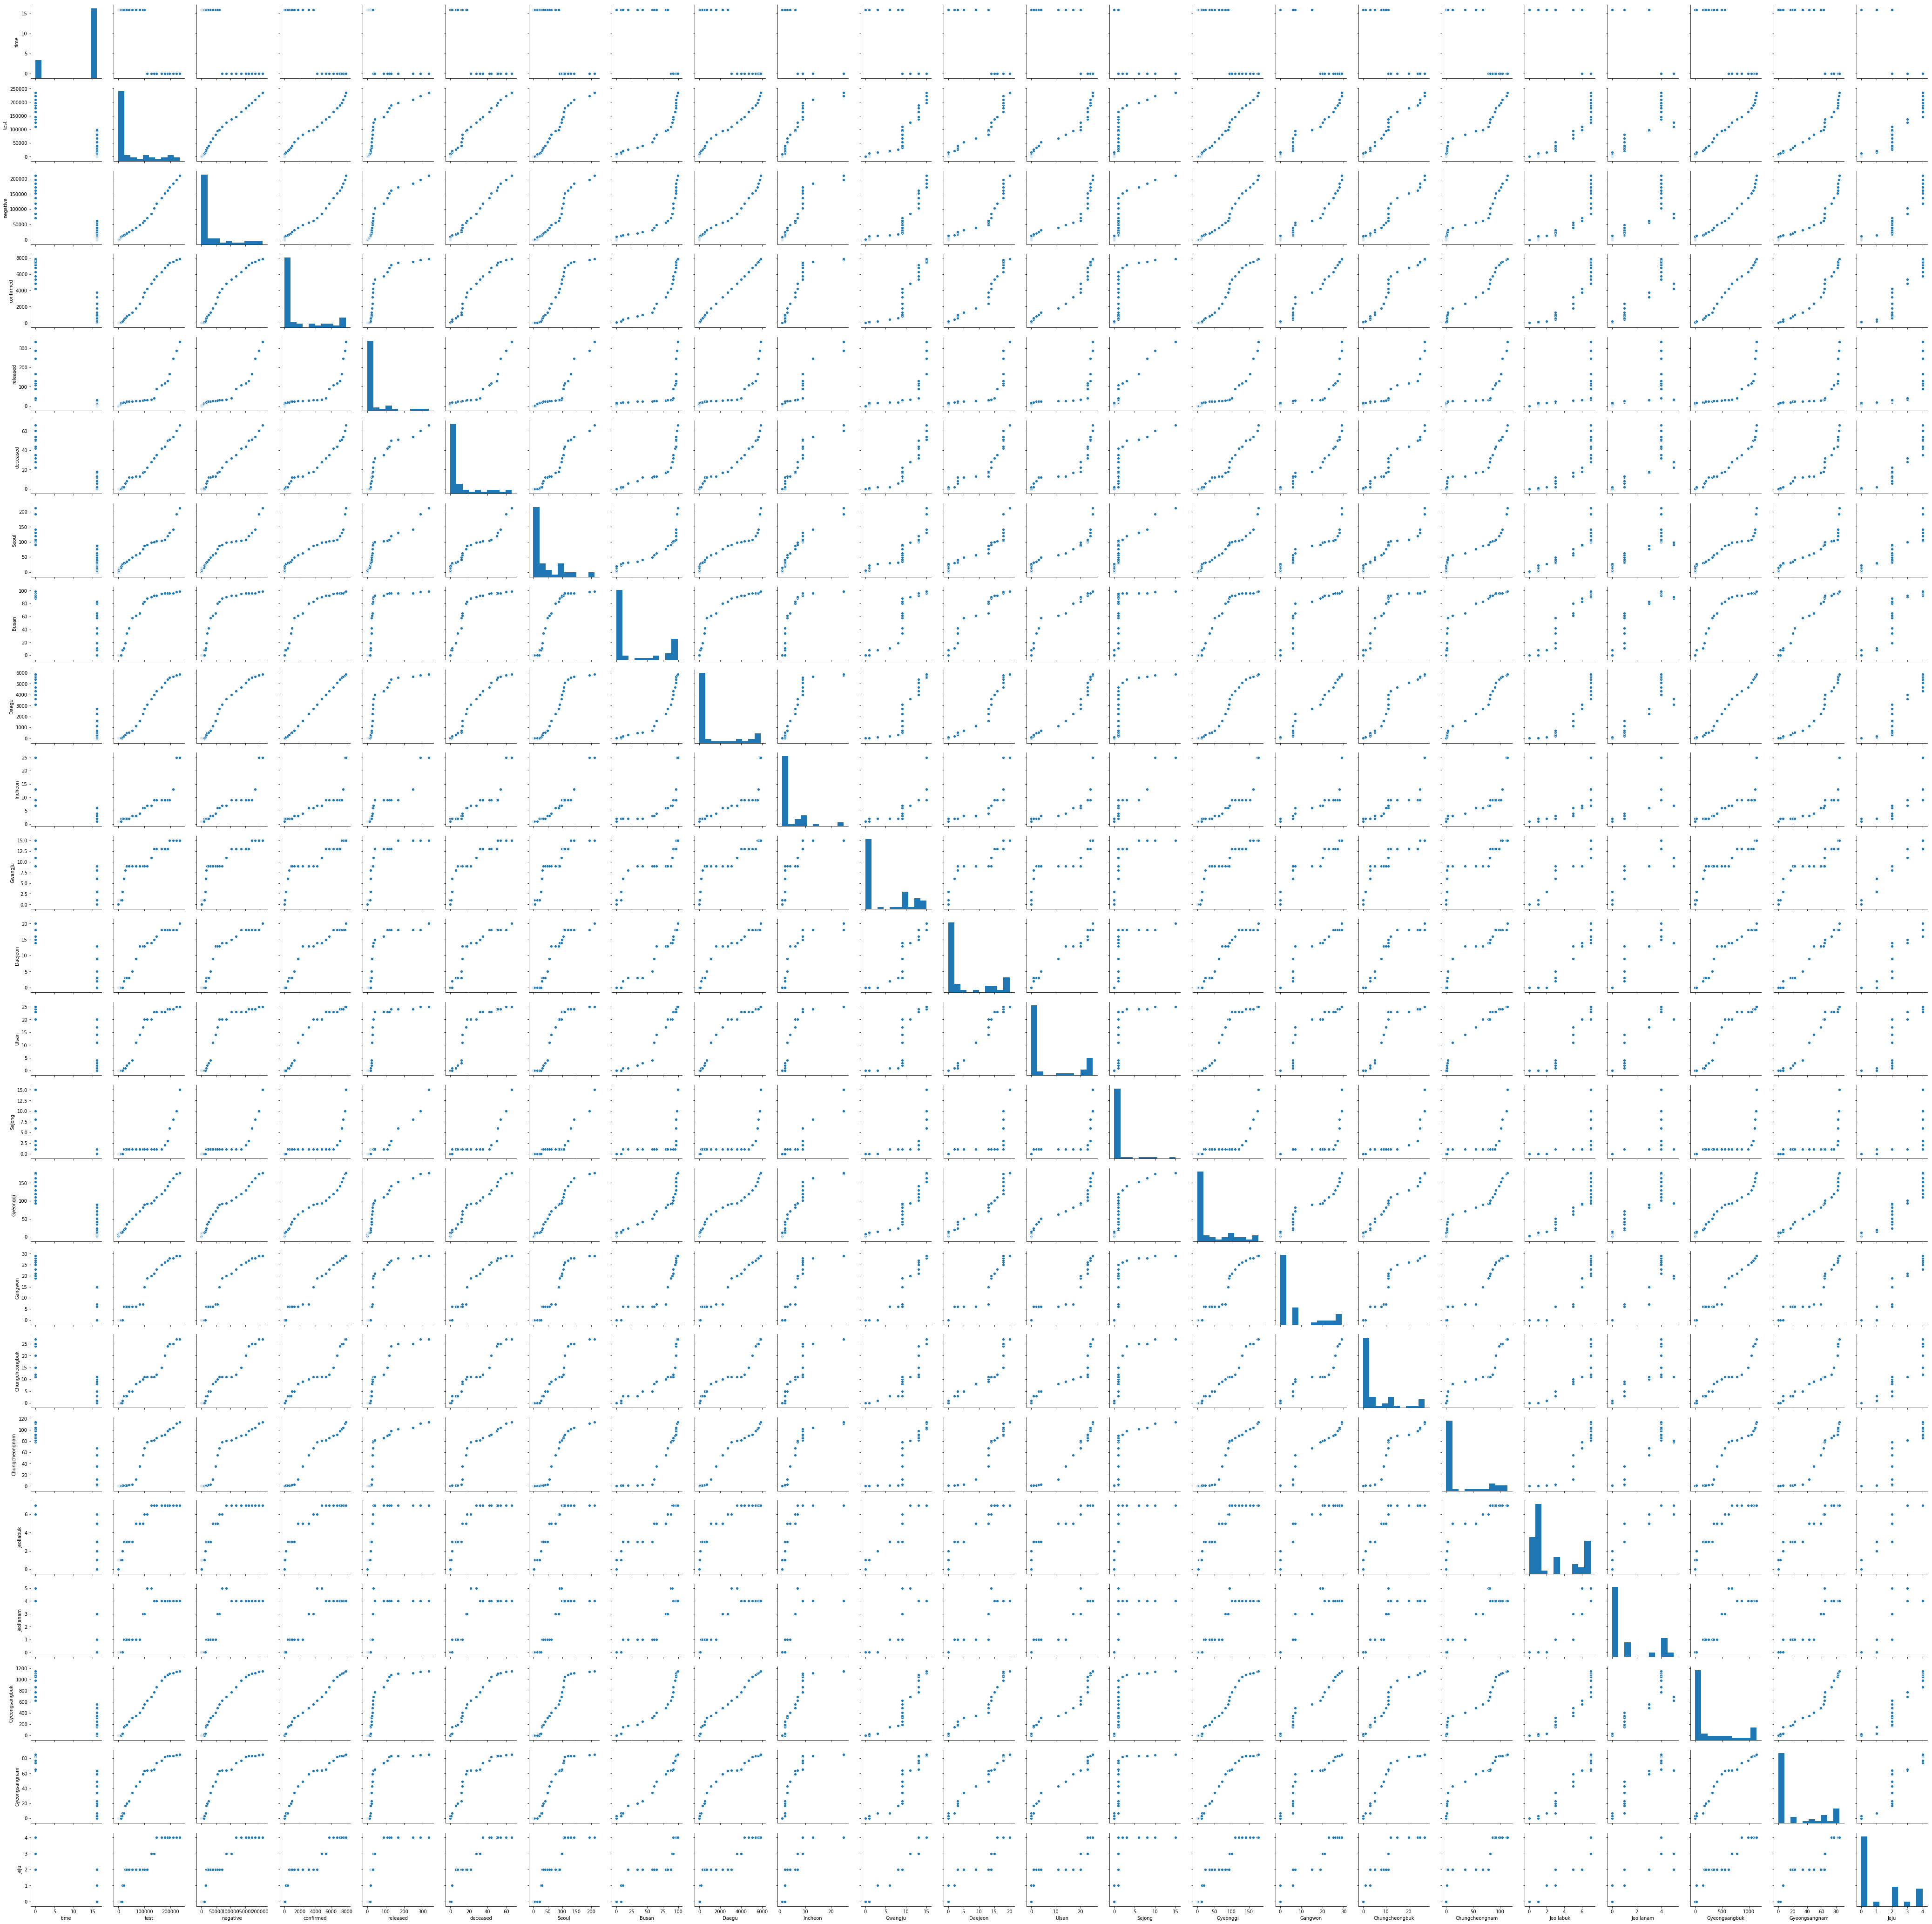

In [45]:
time = pd.read_csv("time.csv")

#check for nulls in the data
time.isnull().sum() 

# check for any correlations between variables seaborn plot 
sns.pairplot(time.dropna())

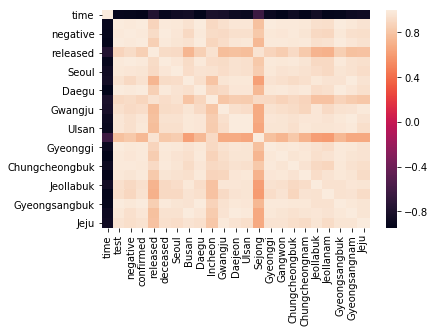

In [46]:
# check for any correlations between variables heatmap 
corr = time.corr()
sns.heatmap(corr)

In [47]:
time.dtypes

date              object
time               int64
test               int64
negative           int64
confirmed          int64
released           int64
deceased           int64
Seoul              int64
Busan              int64
Daegu              int64
Incheon            int64
Gwangju            int64
Daejeon            int64
Ulsan              int64
Sejong             int64
Gyeonggi           int64
Gangwon            int64
Chungcheongbuk     int64
Chungcheongnam     int64
Jeollabuk          int64
Jeollanam          int64
Gyeongsangbuk      int64
Gyeongsangnam      int64
Jeju               int64
dtype: object

In [48]:
time.head()

,date,time,test,negative,confirmed,released,deceased,Seoul,Busan,Daegu,...,Sejong,Gyeonggi,Gangwon,Chungcheongbuk,Chungcheongnam,Jeollabuk,Jeollanam,Gyeongsangbuk,Gyeongsangnam,Jeju
0,2020-01-20,16,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-21,16,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-22,16,4,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-23,16,22,21,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-24,16,27,25,2,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [49]:
# create x and y
feature_cols = 'confirmed' 
x = time[feature_cols] # predictor
y = time.Sejong # response

# split data into train and test
x_train_Sejong, x_test_Sejong, y_train_Sejong, y_test_Sejong = train_test_split(x, y, test_size=0.2) 
# the test set will be 20% of the whole data set

# instantiate, fit
linreg_Sejong = LinearRegression()
linreg_Sejong.fit(x_train_Sejong.values.reshape(-1,1), y_train_Sejong)

print ("Intercept :", linreg_Sejong.intercept_)
print ("Coefficient :", linreg_Sejong.coef_)

predictions_Sejong = linreg_Sejong.predict(x_test_Sejong.astype("int64").values.reshape(-1,1))
#print (x_test.astype("int64").values.reshape(-1,1))
#print (y_test)

mse = mean_squared_error(y_test_Sejong, predictions_Sejong)
print("Mean square error :", np.sqrt(mse))
print("Score :", linreg_Sejong.score(x_test_Sejong.astype("int64").values.reshape(-1,1),y_test))

Intercept : -0.20732404908449475
Coefficient : [0.00077586]
Mean square error : 1.0646646152446486
Score : -0.3662879760472173


In [50]:
# create x and y
feature_cols = 'confirmed' 
x = time[feature_cols] # predictor
y = time.Gangwon # response

# split data into train and test
x_train_Gangwon, x_test_Gangwon, y_train_Gangwon, y_test_Gangwon = train_test_split(x, y, test_size=0.2) 
# the test set will be 20% of the whole data set

# instantiate, fit
linreg_Gangwon = LinearRegression()
linreg_Gangwon.fit(x_train_Gangwon.values.reshape(-1,1), y_train_Gangwon)

print ("Intercept :", linreg_Gangwon.intercept_)
print ("Coefficient :", linreg_Gangwon.coef_)

predictions_Gangwon = linreg_Gangwon.predict(x_test_Gangwon.astype("int64").values.reshape(-1,1))
#print (x_test.astype("int64").values.reshape(-1,1))
#print (y_test)

mse = mean_squared_error(y_test_Gangwon, predictions_Gangwon)
print("Mean square error :", np.sqrt(mse))
print("Score :", linreg_Gangwon.score(x_test_Gangwon.astype("int64").values.reshape(-1,1),y_test_Gangwon))

Intercept : 0.26615190738802674
Coefficient : [0.00376932]
Mean square error : 0.674899537248471
Score : 0.9967941940652186


---<<< So with increment of total confirmed patients Gangwon is more affected by coronavirus than Sejong due as shown below  in the plot >>>---
(linreg_Gangwon.coef_ >> linreg_Sejong.coef_)

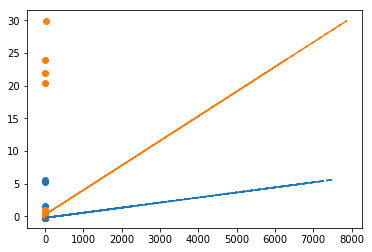

In [52]:
plt.scatter(y_test_Sejong, predictions_Sejong)
y_vals_Sejong = linreg_Sejong.intercept_ + linreg_Sejong.coef_ * (x_test_Sejong.astype("int64").values.reshape(-1,1))
plt.plot(x_test_Sejong.astype("int64").values.reshape(-1,1), y_vals_Sejong, '--')



plt.scatter(y_test, predictions_Gangwon)
y_vals_Gangwon = linreg_Gangwon.intercept_ + linreg_Gangwon.coef_ * (x_test_Gangwon.astype("int64").values.reshape(-1,1))
plt.plot(x_test_Gangwon.astype("int64").values.reshape(-1,1), y_vals_Gangwon, '--')
#plt.xlim((0,400))
#plt.ylim((0,400))